#lib + data generator

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from sklearn.cluster import KMeans

from sklearn.manifold import TSNE

!pip install mlinsights 
from mlinsights.mlmodel import PredictableTSNE

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.3/113.3 kB 6.7 MB/s eta 0:00:00


In [2]:
def datamodel(ns,nb,nt,seed):
  if seed:
    np.random.seed(seed),print("seed = ",seed)
  R=3;av_manifacturing=10;av_demand=10;
  #sellers section
  p_sellers=10*np.ones(ns)
  q_sellers=500*np.ones(ns)
  stock_record=500*np.ones([ns,R])
  selle_record=np.ones([ns,R])
  price_data=p_sellers.copy()
  stok_df=np.mean(np.diff(stock_record,axis=1),axis=1)
  selle_df=np.mean(np.diff(selle_record,axis=1),axis=1)

  #buyers section
  p_byers=15*np.ones(nb)
  buy_record=np.ones([nb,R])
  
  #simulation
  for t in range(nt):
    #buyers activation 
    b_activation=np.arange(nb)
    np.random.shuffle(b_activation)
    for b in b_activation:
      s=np.random.randint(0,ns)
      p_byers[b]=150-(135/R)*buy_record[b,:].sum()
      buy_record[b,:]=np.append(buy_record[b,1:],0)
      if p_byers[b] >= p_sellers[s] and q_sellers[s] > av_demand :
        q_sellers[s]-=av_demand
        selle_record[s,R-1]+=1

    #sellers activation 
    for s in range(ns):
      q_sellers[s]+=av_manifacturing+2*np.random.rand()-1
      p_sellers[s]*=(1+(np.diff(selle_record[s,:]).mean())/100)
      selle_record[s,:]=np.append(selle_record[s,1:],0)
      stock_record[s,:]=np.append(stock_record[s,1:],q_sellers[s])
      variation=np.diff(stock_record[s,:]).mean()
      p_sellers[s]*=(1-variation/300)
    price_data=np.append(price_data,p_sellers)
    stok_df=np.append(stok_df,np.mean(np.diff(stock_record,axis=1),axis=1))
    selle_df=np.append(selle_df,np.mean(np.diff(selle_record,axis=1),axis=1))
  
  return price_data.reshape(nt+1,ns),stok_df.reshape(nt+1,ns),selle_df.reshape(nt+1,ns)



In [3]:
Ts=100
i=1
j=1
print(j," sellers and ",i," buyers")
price,stock_df,selle_df=datamodel(j,i,Ts,seed=None)
x=np.append(price[:-1,0],stock_df[1:,0])
x=np.append(x,selle_df[1:,0]).reshape(3,Ts).T
y=price[1:,0]

for i in range(2,6):
  for j in range(2,6):
    print(j," sellers and ",i," buyers")
    a,b,s=datamodel(j,i,Ts,seed=None)
    xx=np.append(a[:-1,0],b[1:,0])
    xx=np.append(xx,s[1:,0]).reshape(3,Ts).T
    yy=a[1:,0]
    x=np.append(x,xx,axis=0)
    y=np.append(y,yy,axis=0)

1  sellers and  1  buyers
2  sellers and  2  buyers
3  sellers and  2  buyers
4  sellers and  2  buyers
5  sellers and  2  buyers
2  sellers and  3  buyers
3  sellers and  3  buyers
4  sellers and  3  buyers
5  sellers and  3  buyers
2  sellers and  4  buyers
3  sellers and  4  buyers
4  sellers and  4  buyers
5  sellers and  4  buyers
2  sellers and  5  buyers
3  sellers and  5  buyers
4  sellers and  5  buyers
5  sellers and  5  buyers


In [4]:
Ts=100
i=1
j=4
print(j," sellers and ",i," buyers")
price,stock_df,selle_df=datamodel(j,i,Ts,seed=None)
x=np.append(price[:-1,0],stock_df[1:,0])
x=np.append(x,selle_df[1:,0]).reshape(3,Ts).T
y=price[1:,0]

for i in range(2,9):
  print(j," sellers and ",i," buyers")
  a,b,s=datamodel(i,i,Ts,seed=None)
  xx=np.append(a[:-1,0],b[1:,0])
  xx=np.append(xx,s[1:,0]).reshape(3,Ts).T
  yy=a[1:,0]
  x=np.append(x,xx,axis=0)
  y=np.append(y,yy,axis=0)

4  sellers and  1  buyers
4  sellers and  2  buyers
4  sellers and  3  buyers
4  sellers and  4  buyers
4  sellers and  5  buyers
4  sellers and  6  buyers
4  sellers and  7  buyers
4  sellers and  8  buyers


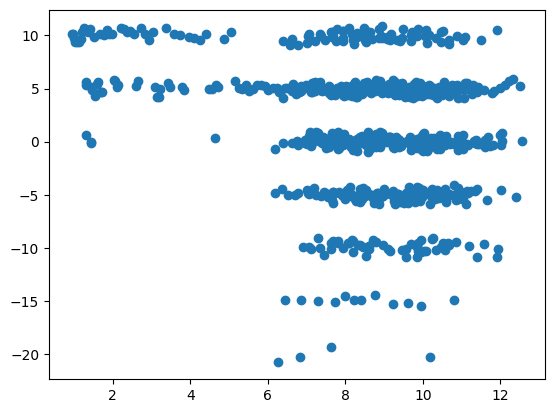

In [6]:
plt.scatter(x[:,0],x[:,1])

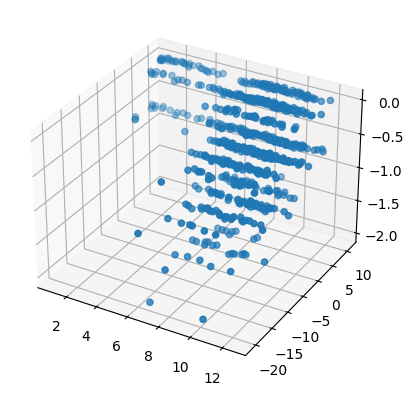

In [7]:

ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x[:,0],x[:,1],x[:,2])

In [8]:
x.shape

(800, 3)

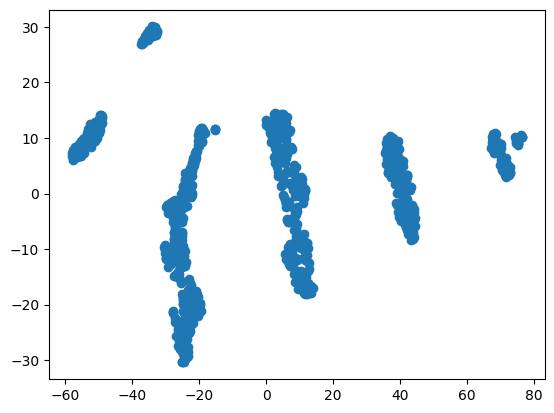

In [9]:
from sklearn.manifold import TSNE

tsne_model = TSNE(learning_rate=100)

transformed = tsne_model.fit_transform(x)


x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

plt.scatter(x_axis, y_axis)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


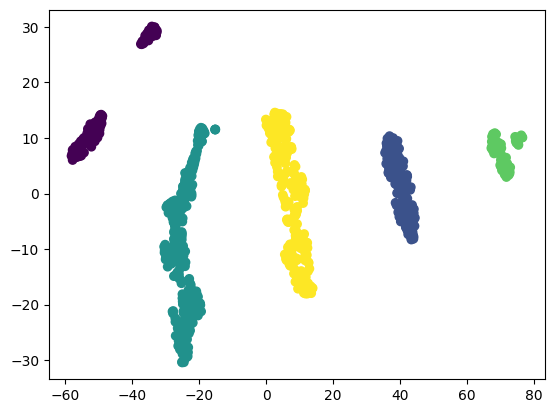

In [10]:
X=transformed.copy()
model = KMeans(5)
model.fit(X)
all_predictions = model.predict(X)
plt.scatter(X[:,0], X[:,1], c=all_predictions )
plt.show()

In [11]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
xtr,xts,ytr,yts=train_test_split(x,all_predictions,test_size=0.2,random_state=0)
a=clf.fit(xtr, ytr)
print(np.mean(clf.predict(xts)==yts))

1.0


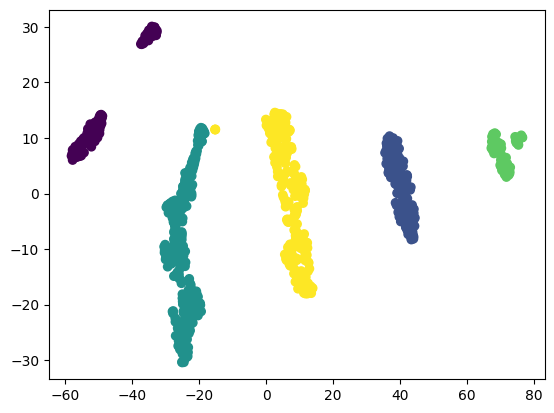

In [12]:
plt.scatter(X[:,0], X[:,1], c=clf.predict(x) )
plt.show()

#TRAINING

In [13]:
from sklearn.linear_model import LinearRegression

action=[]
actions_data=[]
label_data=[]
num_of_actions=all_predictions.max()

for i in range(num_of_actions+1):
  actions_data.append(np.empty((0,3)))
  label_data.append(np.empty((0,)))
#separation of actions
for i in range(x.shape[0]):
  indx=clf.predict(x[i,:].reshape(1,-1))[0]
  actions_data[indx]=np.vstack((actions_data[indx],x[i,:]))
  label_data[indx]=np.append(label_data[indx],y[i])
#training on actions

for i in range(num_of_actions+1):
  x1=actions_data[i]
  y1=label_data[i]
  act=LinearRegression()
  act.fit(x1,y1)
  action.append(act.predict)
  yp=act.predict(x1)
  print("r2 score for action ",i,":",r2_score(y1,yp))


r2 score for action  0 : 0.9999156745461013
r2 score for action  1 : 0.9990584160260456
r2 score for action  2 : 0.9998055976684742
r2 score for action  3 : 0.9991617294280822
r2 score for action  4 : 0.9994734587499413


In [14]:
for i in range(5):
  print(action[i](np.array([[0.,0.,0.]])))

[0.34781866]
[-0.0294703]
[0.25051834]
[-0.32648542]
[0.0801509]


In [15]:
def agent_action(agent_state):
  indx=clf.predict(agent_state.reshape(1,-1))[0]
  return action[indx](agent_state)[0]

agent_action(np.array([[0.,0.,0.]]))

0.08015090099913458

In [16]:
def unsupervised_model(ns,nb,nt,seed):
  if seed:
    np.random.seed(seed),print("seed = ",seed)
  R=3;av_manifacturing=10;av_demand=10;
  #sellers section
  p_sellers=10*np.ones(ns)
  q_sellers=500*np.ones(ns)
  stock_record=500*np.ones([ns,R])
  selle_record=np.ones([ns,R])
  price_data=p_sellers.copy()
  #stok_df=np.mean(np.diff(stock_record,axis=1),axis=1)
  #selle_df=np.mean(np.diff(selle_record,axis=1),axis=1)
  seller_state=np.array([[0.,0.,0.]])
  #buyers section
  p_byers=15*np.ones(nb)
  buy_record=np.ones([nb,R])
  
  #simulation
  for t in range(nt):
    #buyers activation 
    b_activation=np.arange(nb)
    np.random.shuffle(b_activation)
    for b in b_activation:
      s=np.random.randint(0,ns)
      p_byers[b]=150-(135/R)*buy_record[b,:].sum()
      buy_record[b,:]=np.append(buy_record[b,1:],0)
      if p_byers[b] >= p_sellers[s] and q_sellers[s] > av_demand :
        q_sellers[s]-=av_demand
        selle_record[s,R-1]+=1

    #sellers activation 
    for s in range(ns):
      q_sellers[s]+=av_manifacturing+2*np.random.rand()-1
      selle_record[s,:]=np.append(selle_record[s,1:],0)
      stock_record[s,:]=np.append(stock_record[s,1:],q_sellers[s])
      variation=np.diff(stock_record[s,:]).mean()
      seller_state[0,0]=p_sellers[s]
      seller_state[0,1]=variation
      seller_state[0,2]=np.diff(selle_record[s,:]).mean()
      p_sellers[s]=agent_action(seller_state)
      #if s==0:
        #print(seller_state)
    price_data=np.append(price_data,p_sellers)
    #stok_df=np.append(stok_df,np.mean(np.diff(stock_record,axis=1),axis=1))
    #selle_df=np.append(selle_df,np.mean(np.diff(selle_record,axis=1),axis=1))
  
  return price_data.reshape(nt+1,ns)#,stok_df.reshape(nt+1,ns),selle_df.reshape(nt+1,ns)





seed =  872
seed =  872


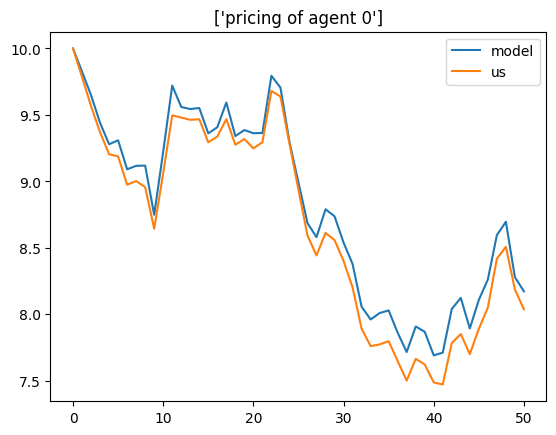

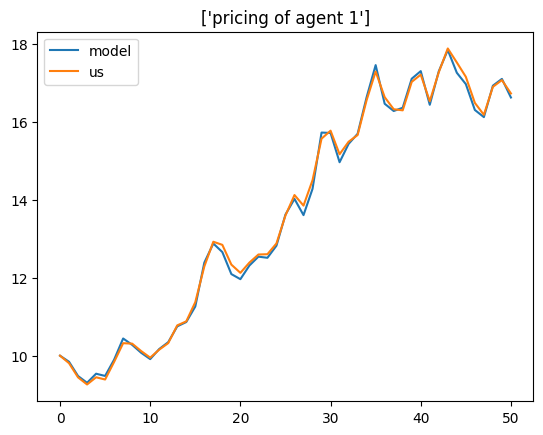

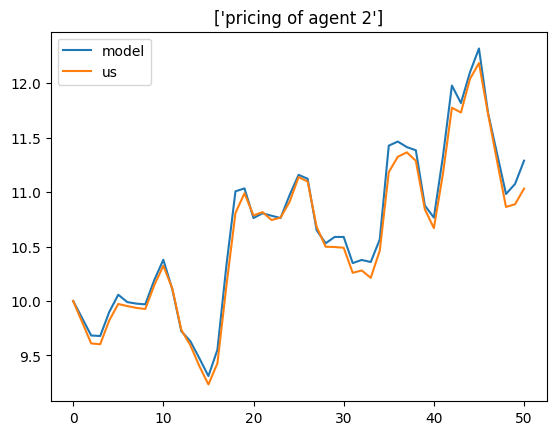

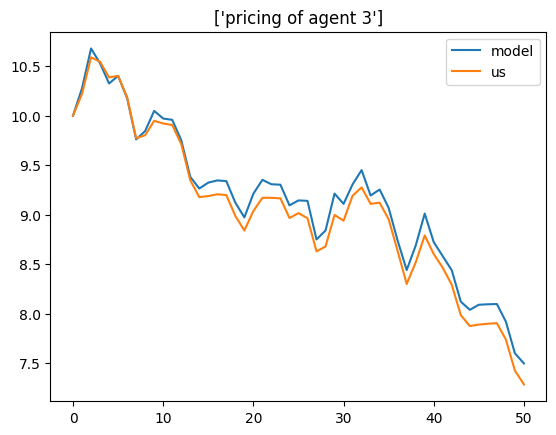

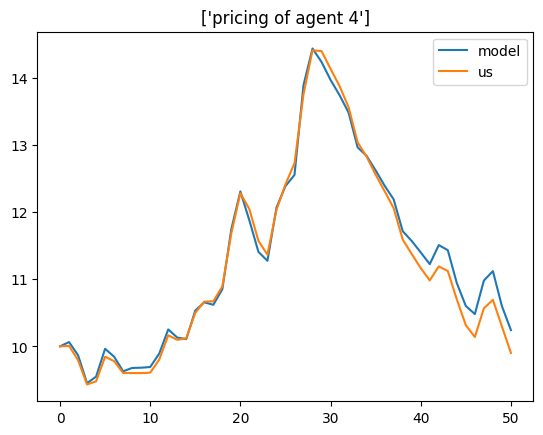

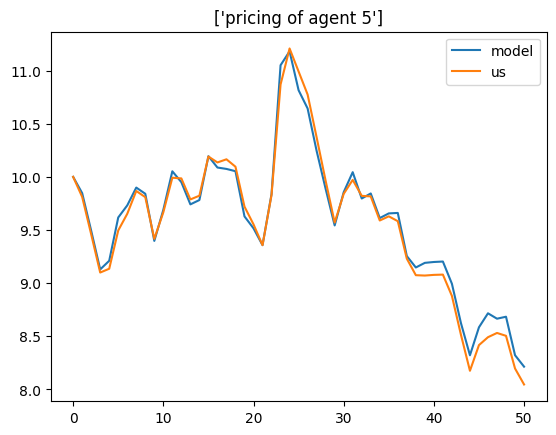

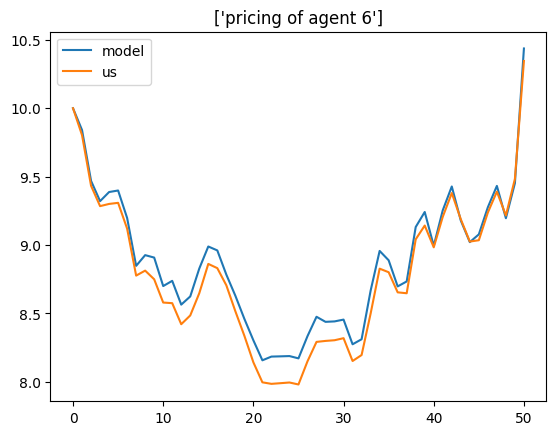

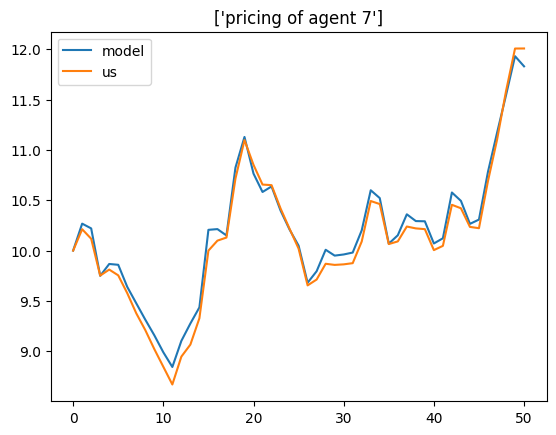

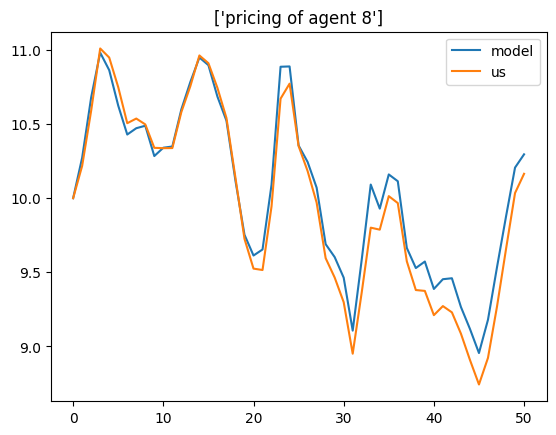

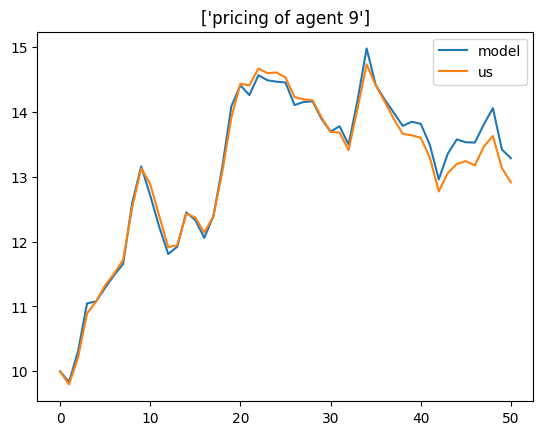

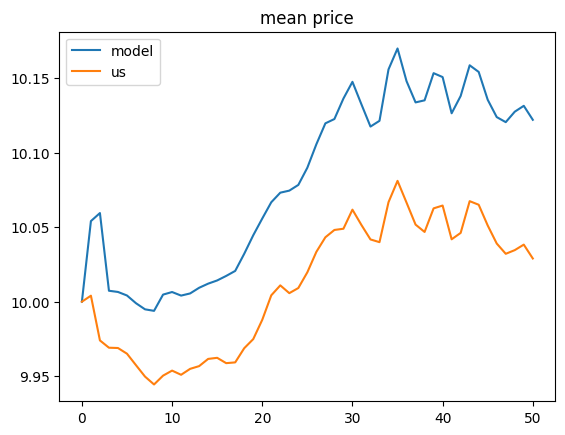

In [17]:
s=np.random.randint(900)

ns=30
nb=30
us_price=unsupervised_model(ns,nb,50,seed=s)
modelprice,a,b=datamodel(ns,nb,50,seed=s)
for i in range(0,10):
  plt.figure()
  plt.title(["pricing of agent "+str(i)])
  plt.plot(modelprice[:,i])
  plt.plot(us_price[:,i])
  plt.legend(["model","us"])

plt.figure()
plt.plot(modelprice.mean(1))
plt.plot(us_price.mean(1))
plt.title("mean price")
plt.legend(["model","us"])

Text(0.5, 1.0, 'mean price')

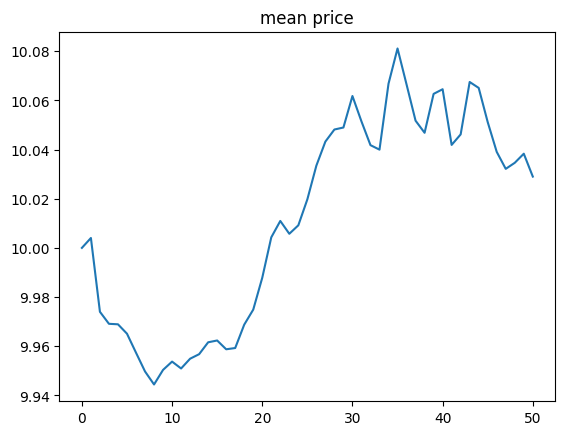

In [18]:
plt.figure()
plt.plot(us_price.mean(1))

plt.title("mean price")

In [19]:
us_price

array([[10.        , 10.        , 10.        , ..., 10.        ,
        10.        , 10.        ],
       [ 9.7850986 ,  9.80730423,  9.80584127, ..., 10.00449027,
         9.79855865,  9.99193155],
       [ 9.5656526 ,  9.44307041,  9.6101094 , ...,  9.9516783 ,
         9.60332342,  9.74741374],
       ...,
       [ 8.50738989, 16.90328808, 10.8636137 , ...,  5.68599959,
         9.40270657,  9.6497841 ],
       [ 8.18525912, 17.07640697, 10.88801534, ...,  5.83770267,
         9.03525237,  9.64845046],
       [ 8.03701635, 16.73322945, 11.03175797, ...,  5.78833481,
         9.06465829,  9.47174191]])